# Fraud Detection in Electricity and Gas Consumption
https://zindi.africa/competitions/ai-hack-tunisia-4-predictive-analytics-challenge-1

## Evaluation:

The metric used for this challenge is AUC

* client_id       target
* test_Client_0   0.986
* test_Client_1   0.011
* test_Client_10  0.734

## Variable Definitions

**Client**

* Client_id: Unique id for client
* District: District where the client is
* Client_catg: Category client belongs to
* Region: Area where the client is
* Creation_date: Date client joined
* Target: fraud:1 , not fraud: 0

**Invoice data**

* Client_id: Unique id for the client
* Invoice_date: Date of the invoice
* Tarif_type: Type of tax
* Counter_number:
* Counter_statue: takes up to 5 values such as working fine, not working, on hold statue, ect
* Counter_code:
* Reading_remarque: notes that the STEG agent takes during his visit to the client (e.g: If the counter shows something wrong, the agent gives a bad score)
* Counter_coefficient: An additional coefficient to be added when standard consumption is exceeded
* Consommation_level_1: Consumption_level_1
* Consommation_level_2: Consumption_level_2
* Consommation_level_3: Consumption_level_3
* Consommation_level_4: Consumption_level_4
* Old_index: Old index
* New_index: New index
* Months_number: Month number
* Counter_type: Type of counter



## Placeholder

This is in case I need to install something new

In [12]:
# !pip install matplotlib
#!pip install seaborn

     |████████████████████████████████| 215 kB 641 kB/s eta 0:00:01


## Import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
# Here I am importing the dataset and parsing the date fields to a pandas date
client_train_df = pd.read_csv("data/client_train.csv", low_memory=False, parse_dates=["creation_date"])
invoice_train_df = pd.read_csv("data/invoice_train.csv", low_memory=False, parse_dates=["invoice_date"])


In [3]:
# Let's check the features for the client train dataset
client_train_df.head().T

,0,1,2,3,4
disrict,60,69,62,69,62
client_id,train_Client_0,train_Client_1,train_Client_10,train_Client_100,train_Client_1000
client_catg,11,11,11,11,11
region,101,107,301,105,303
creation_date,1994-12-31 00:00:00,2002-05-29 00:00:00,1986-03-13 00:00:00,1996-11-07 00:00:00,2014-10-14 00:00:00
target,0,0,0,0,0


In [4]:
# Let's check the features for the invoice train dataset
invoice_train_df.head().T

,0,1,2,3,4
client_id,train_Client_0,train_Client_0,train_Client_0,train_Client_0,train_Client_0
invoice_date,2014-03-24 00:00:00,2013-03-29 00:00:00,2015-03-23 00:00:00,2015-07-13 00:00:00,2016-11-17 00:00:00
tarif_type,11,11,11,11,11
counter_number,1335667,1335667,1335667,1335667,1335667
counter_statue,0,0,0,0,0
counter_code,203,203,203,207,207
reading_remarque,8,6,8,8,9
counter_coefficient,1,1,1,1,1
consommation_level_1,82,1200,123,102,572
consommation_level_2,0,184,0,0,0


In [17]:
# Let's analyze the information
invoice_train_df.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


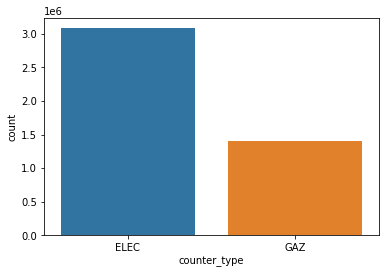

In [20]:
sns.countplot(x="counter_type", data=invoice_train_df)

In [21]:
# Transform the target to bool, it is not necesary but I like it better
client_train_df["target"] = client_train_df["target"].astype(bool)

In [22]:
# Let's create a function to clean the datasets
def clean_and_merge_datasets(client_df, invoice_df):
    # Shuffle the datasets
    client_df = shuffle(client_df)
    invoice_df = shuffle(invoice_df)
    
    # Split dates into relevant fields
    invoice_df["invoice_date_year"] = invoice_df.invoice_date.dt.year
    invoice_df["invoice_date_month"] = invoice_df.invoice_date.dt.month
    
    # Transform string features into categorical type, for some reason the model is throwing an
    # error when using the categorical feature so, I need to add the key to the dataset
    client_df["client_id"] = client_df.client_id.astype("category").cat.as_ordered()
    client_df["client_id_key"] = client_df.client_id.cat.codes
    
    invoice_df["counter_type"] = invoice_df.counter_type.astype("category").cat.as_ordered()
    invoice_df["counter_type_key"] = invoice_df.counter_type.cat.codes
    
    invoice_df["counter_statue"] = invoice_df.counter_statue.astype("category").cat.as_ordered()
    invoice_df["counter_statue_key"] = invoice_df.counter_statue.cat.codes
   
    # Drop 'useless' features
    client_df.drop("creation_date", axis=1, inplace=True)
    invoice_df.drop("counter_number", axis=1, inplace=True)
    invoice_df.drop("counter_code", axis=1, inplace=True)
    invoice_df.drop("months_number", axis=1, inplace=True)
    invoice_df.drop("invoice_date", axis=1, inplace=True)
    
    # Merge the dataframes
    return pd.merge(client_df, invoice_df)


In [23]:
train_df_full = clean_and_merge_datasets(client_train_df, invoice_train_df)

In [24]:
# Let's check the train_df_full features
train_df_full.head().T

,0,1,2,3,4
disrict,63,63,63,63,63
client_id,train_Client_48854,train_Client_48854,train_Client_48854,train_Client_48854,train_Client_48854
client_catg,11,11,11,11,11
region,313,313,313,313,313
target,False,False,False,False,False
client_id_key,78666,78666,78666,78666,78666
tarif_type,11,11,11,11,11
counter_statue,0,0,0,0,0
reading_remarque,9,9,9,9,9
counter_coefficient,1,1,1,1,1


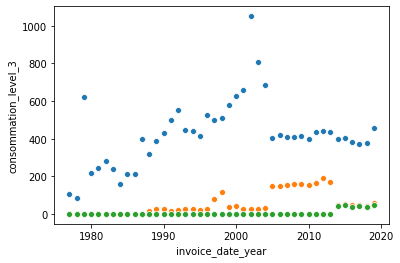

In [31]:
summ_df = train_df_full.groupby("invoice_date_year", as_index= False).mean()
sns.scatterplot(x=summ_df["invoice_date_year"], y=summ_df["consommation_level_1"])
sns.scatterplot(x=summ_df["invoice_date_year"], y=summ_df["consommation_level_2"])
sns.scatterplot(x=summ_df["invoice_date_year"], y=summ_df["consommation_level_3"])

In [46]:
# Create a copy to drop the features
train_df = train_df_full.copy()

# Drop string features
train_df.drop("client_id", axis=1, inplace=True)
train_df.drop("counter_type", axis=1, inplace=True)
train_df.drop("counter_statue", axis=1, inplace=True)

In [47]:
# Checking for missing information
train_df.isna().sum()

disrict                 0
client_catg             0
region                  0
target                  0
client_id_key           0
tarif_type              0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
invoice_date_year       0
invoice_date_month      0
counter_type_key        0
counter_statue_key      0
dtype: int64

In [48]:
# Prepare the information in Train and Test data
from sklearn.model_selection import train_test_split

X = train_df.drop("target", axis=1)
y = train_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
# Check the shapes to be sure it was well splitted
X_train.shape, X_test.shape

((3581399, 17), (895350, 17))

In [50]:
# User RandomForestClassifier as approach
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(verbose=True, n_jobs=-1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None,
                       verbose=True, warm_start=False)

In [51]:
clf.score(X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   20.3s finished


0.9326285810018429

In [52]:
# I should save the model at this point....
import pickle

pickle.dump(clf, open("RandomForestClassifier_trainedModel", 'wb'))


In [53]:
# Read model
clf = pickle.load(open("data/RandomForestClassifier_trainedModel", "rb"))

In [54]:
# Let's predict over test to check the results

preds = clf.predict(X_test)
preds_proba = clf.predict_proba(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   19.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   16.1s finished


In [55]:
# Let's create a copy of X_test and add the predicted probability of a positive result column
X_test_w_proba = X_test.copy()
preds_proba_positive = preds_proba[:,1]
X_test_w_proba["predicted_proba"] = preds_proba_positive

In [56]:
# For each client let's calculate the mean of a positive result
X_test_w_proba.groupby("client_id_key").mean()

,disrict,client_catg,region,tarif_type,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,invoice_date_year,invoice_date_month,counter_type_key,counter_statue_key,predicted_proba
client_id_key,,,,,,,,,,,,,,,,,
0,60.0,11.0,101.0,11.000000,6.750,1.0,491.250,23.00,0.00,0.0,10839.875000,11354.125000,2011.625000,7.250000,0.000000,0.000000,0.060000
1,69.0,11.0,107.0,11.000000,6.625,1.0,548.125,0.00,0.00,0.0,13164.750000,13712.875000,2010.875000,6.875000,0.000000,0.000000,0.092500
2,62.0,11.0,301.0,11.000000,7.000,1.0,681.750,0.00,0.00,0.0,34483.750000,35165.500000,2012.000000,7.750000,0.000000,0.000000,0.042500
3,69.0,11.0,105.0,11.000000,6.000,1.0,1.000,0.00,0.00,0.0,98.000000,99.000000,2010.000000,9.000000,0.000000,0.000000,0.000000
4,62.0,11.0,303.0,11.000000,9.000,1.0,636.750,139.75,10.75,0.0,3909.500000,4696.750000,2016.000000,5.000000,0.000000,0.000000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135487,60.0,11.0,101.0,10.000000,6.000,1.0,0.000,0.00,0.00,0.0,8147.000000,8147.000000,2006.000000,12.000000,0.000000,0.000000,0.020000
135488,62.0,11.0,304.0,23.428571,6.000,1.0,0.000,0.00,0.00,0.0,8.000000,8.000000,2013.000000,6.714286,0.428571,0.571429,0.011429
135489,63.0,11.0,311.0,35.166667,7.750,1.0,96.750,0.00,0.00,0.0,906.083333,1002.833333,2015.916667,6.916667,0.833333,0.250000,0.105000


In [57]:
# Let's create the a result dataframe with empty columns and add the client_id_key and the predicted proba
X_test_results = pd.DataFrame(columns=["client_id_key", "predicted_proba"])
X_test_results["client_id_key"] = X_test_w_proba["client_id_key"]
X_test_results["predicted_proba"] = X_test_w_proba["predicted_proba"]

In [58]:
# Group the results to remove duplicates keeping the same index
X_test_results = X_test_results.groupby("client_id_key", as_index=False).mean().sort_values(by="predicted_proba")

In [59]:
# Here is the result, but because the model didn't work with categories 
# we need to add them back and remove the key

X_test_results.head()

,client_id_key,predicted_proba
95797,107975,0.0
77742,87592,0.0
45605,51371,0.0
57447,64760,0.0
70157,79068,0.0


In [60]:
# Create a DataFrame containing the client_id and client_id_key relationship

client_w_key = pd.DataFrame(columns=["client_id", "client_id_key"])
client_w_key["client_id"] = train_df_full["client_id"]
client_w_key["client_id_key"] = train_df_full["client_id_key"]
client_w_key = client_w_key.drop_duplicates()
client_w_key

,client_id,client_id_key
0,train_Client_48854,78666
11,train_Client_128082,31206
36,train_Client_3,57716
64,train_Client_31233,59089
91,train_Client_127486,30543
...,...,...
4476672,train_Client_124795,27553
4476682,train_Client_62961,94341
4476685,train_Client_1772,44073
4476689,train_Client_65950,97662


In [61]:
# Merge with the DataFrame Containing the probability of positive fraud

X_test_results = pd.merge(client_w_key, X_test_results)
X_test_results

,client_id,client_id_key,predicted_proba
0,train_Client_48854,78666,0.050000
1,train_Client_128082,31206,0.023333
2,train_Client_3,57716,0.047500
3,train_Client_31233,59089,0.040000
4,train_Client_127486,30543,0.083333
...,...,...,...
120251,train_Client_82598,116159,0.025000
120252,train_Client_115025,16699,0.165000
120253,train_Client_123657,26289,0.000000
120254,train_Client_65950,97662,0.076667


In [62]:
# Make some queries to validate info
X_test_results = X_test_results.sort_values("client_id")
X_test_results[X_test_results["predicted_proba"] > 0.2]

,client_id,client_id_key,predicted_proba
70802,train_Client_100004,10,0.220000
83800,train_Client_100006,12,0.253333
41069,train_Client_100010,17,0.240000
99124,train_Client_100011,18,0.307000
1243,train_Client_100015,22,0.248000
...,...,...,...
72329,train_Client_99943,135431,0.206250
33816,train_Client_99947,135435,0.758333
62959,train_Client_99954,135443,0.487500
32294,train_Client_99980,135472,0.720000


In [63]:
# Let's calculate the ROC Curve

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, preds_proba_positive)

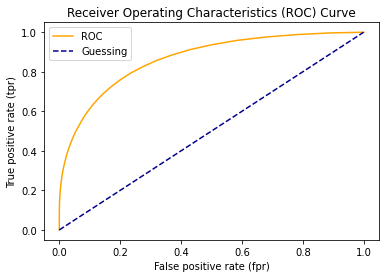

In [64]:
def plot_roc_curve(fpr, tpr):
    """
    Plots ROC curve
    """
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color ="darkblue", linestyle="--", label="Guessing")
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [65]:
roc_auc_score(y_test, preds_proba_positive)

0.8644574391947698

In [ ]:
# Improve the model tunning the hyperparameters  

# This is going to take a loooooong time in my local machine... probably I should run it on Google Colab or something like that
from sklearn.model_selection import RandomizedSearchCV

# max_depth
# max_features
# min_samples_leaf
# min_samples_split
# n_estimators

hyperparameters = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
                  "max_depth": [None, 5, 10, 20, 30],
                  "max_features": ["auto", "sqrt"],
                  "min_samples_split": [2, 4, 6],
                  "min_samples_leaf": [1, 2, 4]}

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=hyperparameters,
                           n_iter=10,
                           cv=5,
                           verbose=2)

rs_clf.fit(X_train, y_train);

# Evaluate the Final Information

In [66]:
client_test_df = pd.read_csv("data/client_test.csv", low_memory=False, parse_dates=["creation_date"])
invoice_test_df = pd.read_csv("data/invoice_test.csv", low_memory=False, parse_dates=["invoice_date"])

In [67]:
test_df_full = clean_and_merge_datasets(client_test_df, invoice_test_df)

# Create a copy to drop the features
test_df = test_df_full.copy()

# Drop string features
test_df.drop("client_id", axis=1, inplace=True)
test_df.drop("counter_type", axis=1, inplace=True)
test_df.drop("counter_statue", axis=1, inplace=True)

In [760]:
# Checking for missing information
test_df.isna().sum()

disrict                 0
client_catg             0
region                  0
client_id_key           0
tarif_type              0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
invoice_date_year       0
invoice_date_month      0
counter_type_key        0
counter_statue_key      0
dtype: int64

In [761]:
# Let's predict over test to check the results

preds = clf.predict(test_df)
preds_proba = clf.predict_proba(test_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


In [762]:
# Let's create a copy of X_test and add the predicted probability of a positive result column
test_df_w_proba = test_df.copy()
preds_proba_positive = preds_proba[:,1]
test_df_w_proba["predicted_proba"] = preds_proba_positive

In [771]:
# For each client let's calculate the mean of a positive result
test_df_w_proba.groupby("client_id_key").mean()

# Let's create the a result dataframe with empty columns and add the client_id_key and the predicted proba
X_test_results = pd.DataFrame(columns=["client_id_key", "predicted_proba"])
X_test_results["client_id_key"] = test_df_w_proba["client_id_key"]
X_test_results["predicted_proba"] = test_df_w_proba["predicted_proba"]

# Group the results to remove duplicates keeping the same index
X_test_results = X_test_results.groupby("client_id_key", as_index=False).mean().sort_values(by="predicted_proba")

X_test_results.head()

,client_id_key,predicted_proba
55291,55291,0.0
49102,49102,0.0
13234,13234,0.0
17507,17507,0.0
27303,27303,0.0


In [772]:
# Create a DataFrame containing the client_id and client_id_key relationship

client_w_key = pd.DataFrame(columns=["client_id", "client_id_key"])
client_w_key["client_id"] = test_df_full["client_id"]
client_w_key["client_id_key"] = test_df_full["client_id_key"]
client_w_key = client_w_key.drop_duplicates()
client_w_key

,client_id,client_id_key
0,test_Client_45515,39464
22,test_Client_24164,15741
63,test_Client_22592,13994
66,test_Client_6952,54684
148,test_Client_43712,37461
...,...,...
1939619,test_Client_19437,10488
1939625,test_Client_54458,49400
1939695,test_Client_45110,39015
1939707,test_Client_11617,1800


In [774]:
# Merge with the DataFrame Containing the probability of positive fraud

X_test_results = pd.merge(client_w_key, X_test_results)
X_test_results

,client_id,client_id_key,predicted_proba
0,test_Client_45515,39464,0.017727
1,test_Client_24164,15741,0.097073
2,test_Client_22592,13994,0.003333
3,test_Client_6952,54684,0.086341
4,test_Client_43712,37461,0.159474
...,...,...,...
58064,test_Client_19437,10488,0.003333
58065,test_Client_54458,49400,0.070286
58066,test_Client_45110,39015,0.125833
58067,test_Client_11617,1800,0.077143


In [776]:
# Drop the ID key
X_test_results.drop("client_id_key", axis=1, inplace=True)

In [781]:
# Make some queries to validate info
X_test_results.rename(columns={"predicted_proba":"target"}, inplace=True)
X_test_results = X_test_results.sort_values("client_id")
X_test_results[X_test_results["target"] > 0.2]

,client_id,target
56859,test_Client_0,0.344324
24402,test_Client_1,0.246818
34970,test_Client_10,0.214595
34492,test_Client_10000,0.204167
51545,test_Client_10002,0.379610
...,...,...
39111,test_Client_9922,0.222000
7778,test_Client_9927,0.345135
20956,test_Client_9966,0.290000
36381,test_Client_997,0.393750


In [783]:
# Save the results as the required Output
X_test_results.to_csv('data/Result.csv',index=False)